In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False )

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
conn = engine.connect()
meas_df = pd.read_sql("SELECT * FROM station", conn)
meas_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
#The last date in the measurement database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [15]:
#to prevent abnormal data at the last_dae 2017-08-23, take the last_date minus one day as the last_dateminus1 (lastday)
last_dateminus1 = ('2017-08-22')

In [16]:
#The date of 12 months before the last_dateminus1 date
oneyearbefore_date = dt.date(2017, 8, 22) - dt.timedelta(days=365)
oneyearbefore_date

datetime.date(2016, 8, 22)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# to average daly precipitations into one value per_day
precipi = session.query(Measurement.date, func.avg(Measurement.prcp)).\
             filter(Measurement.date.between(oneyearbefore_date, last_dateminus1)).\
             group_by(Measurement.date).all()
precipi

[('2016-08-22', 1.052),
 ('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.147142857142

In [18]:
#build to lists for dates and percipitations and prepared for charts plot
dates = []
precs = []
for p in precipi:
    if p[0] and p[1]:
        dates.append(p[0])
        precs.append(p[1])       

In [19]:
#Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
date_precip_yearago = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date == oneyearbefore_date).all()
date_precip_yearago

[('2016-08-22', 0.4),
 ('2016-08-22', 0.94),
 ('2016-08-22', None),
 ('2016-08-22', None),
 ('2016-08-22', 0.4),
 ('2016-08-22', 2.32),
 ('2016-08-22', 1.2)]

In [20]:
# Save the query results as a Pandas DataFrame 
data = {"date":dates, "precipitation":precs}
prec_df = pd.DataFrame(data)
prec_df.head()

,date,precipitation
0,2016-08-22,1.052000
1,2016-08-23,0.451667
2,2016-08-24,1.555000
3,2016-08-25,0.077143
4,2016-08-26,0.016667


In [21]:
# sort the date column and set the index to the date column
prec_df.sort_values(by=['date'], inplace = True)
prec_df.set_index('date', inplace = True)
prec_df.head()

,precipitation
date,
2016-08-22,1.052000
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667


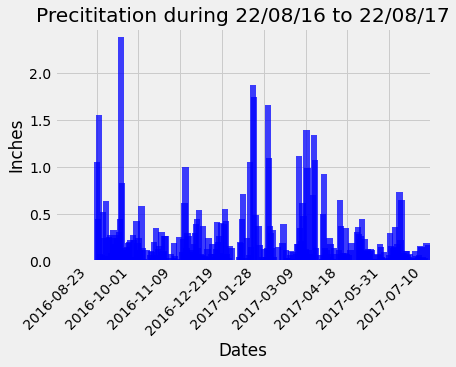

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
ticker = ['2016-08-23','2016-10-01','2016-11-09','2016-12-219','2017-01-28','2017-03-09',\
          '2017-04-18','2017-05-31','2017-07-10']
#x_axis = np.arange(0, len(prec_df.index))
x_axis = np.arange(-40, 360, 40)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Precititation during 22/08/16 to 22/08/17")
plt.xlabel("Dates")
plt.ylabel("Inches")

plt.xlim(0, len(prec_df.index)+.25)
plt.ylim(0, max(prec_df.precipitation) + 0.1)
plt.style.use('fivethirtyeight')
plt.bar(prec_df.index, prec_df.precipitation, facecolor="blue", width = 6, alpha=0.75, align="center")
plt.xticks(tick_locations, ticker, rotation="45")
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df["precipitation"].describe()

count    318.000000
mean       0.199423
std        0.312846
min        0.001429
25%        0.024250
50%        0.095000
75%        0.237292
max        2.380000
Name: precipitation, dtype: float64

In [25]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station).distinct(Station.station).count()
total_stations

9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#The most active station is 'USC00519281', refer to the query
busy_stations = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).\
                order_by(func.count(Measurement.prcp).desc()).all()
busy_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station =='USC00519281').all()
temperature #the following list [lowest temperature, highest temperature, average temperature] in sequence.

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
tem_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                order_by(func.count(Measurement.prcp).desc()).all()
tem_stations #the station with the highest number of temperature observations (tobs) is the same as above 'USC00519281'.

[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#in case, one day had several observations, I take the average temperature of that day as the day's value
#my query tobs for the dates between 22/08/16 to 22/08/17
temperature_year = session.query(Measurement.date, func.avg(Measurement.tobs)).\
             filter(Measurement.date.between(oneyearbefore_date, last_dateminus1)).\
             filter(Measurement.station =='USC00519281').group_by(Measurement.date).all()
temperature_year


[('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-

In [30]:
#build to lists for dates and tobs, creat tobs_df prepared for histogram charts plot
tdates = []
tobs = []
for t in temperature_year:
    if t[0] and t[1]:
        tdates.append(t[0])
        tobs.append(t[1])  
data2 = {"temp_date":tdates, "temp_obs":tobs}
tobs_df = pd.DataFrame(data2)
tobs_df.head()

,temp_date,temp_obs
0,2016-08-22,78.0
1,2016-08-23,77.0
2,2016-08-24,77.0
3,2016-08-25,80.0
4,2016-08-26,80.0


Text(0, 0.5, 'Frequencies')

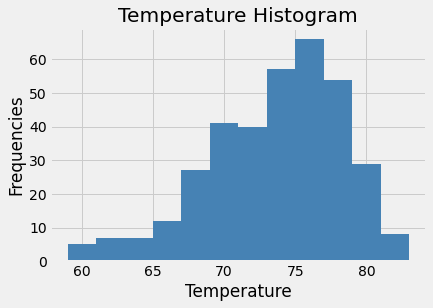

In [31]:
#The required histogram charts plot
#plt.style.use('seaborn-white')

data = tobs_df['temp_obs']
plt.style.use('fivethirtyeight')
plt.hist(data,bins=12, alpha= 1, histtype='stepfilled', color='steelblue', edgecolor='none' )
plt.title("Temperature Histogram")
plt.xlabel("Temperature")
plt.ylabel("Frequencies")


## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


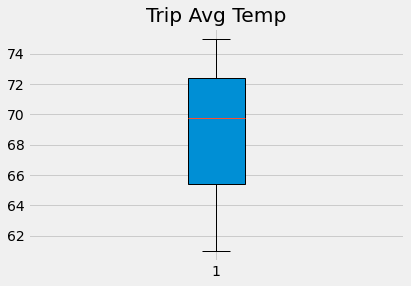

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
import numpy as np

ptps = calc_temps('2011-02-28', '2011-03-05')

fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('Trip Avg Temp')
plt.show()


In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
selt = [func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude,\
                         Station.elevation]
trip_prec = session.query(*selt).filter(Measurement.date.between('2011-02-28','2011-03-05')).\
                         group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
trip_prec

[(13.609999999999996,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (13.609999999999996,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (13.609999999999996,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (13.609999999999996,
  'USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6),
 (13.609999999999996,
  'USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9),
 (13.609999999999996,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (13.609999999999996,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (13.609999999999996,
  'USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 (13.609999999999996,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9)]

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# Set the start and end date of the trip
# My trip between('2011-02-28','2011-03-05')
# push each tuple of calculations into a list called `normals`
# Loop through the list of %m-%d strings and calculate the normals for each date
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

sdate = dt.date(2011, 2, 28)   # start date
edate = dt.date(2011, 3, 5)   # end date
delta = edate - sdate  # as timedelta

normals = []

for i in range(delta.days + 1):
    day = sdate + dt.timedelta(days=i)
    dtdate = day.strftime("%m-%d")
    normals.append(daily_normals(dtdate))
    
normals

[[(65.0, 70.65517241379311, 80.0)],
 [(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)]]

In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Trip_dates = ["2011-02-28", "2011-03-01","2011-03-02","2011-03-03","2011-03-04","2011-03-05"]
mint = []
avgt = []
maxt = []
for n in range(len(normals)):
    l = list(normals[n][0])
    mint.append(l[0])
    avgt.append(l[1])
    maxt.append(l[2])
trip_dict = {"Trip_Day":Trip_dates, "Min_T":mint, "Avg_T":avgt, "Max_T":maxt}
trip_df = pd.DataFrame(trip_dict)
trip_df.head(6)

,Trip_Day,Min_T,Avg_T,Max_T
0,2011-02-28,65.0,70.655172,80.0
1,2011-03-01,64.0,70.032787,76.0
2,2011-03-02,61.0,70.366667,78.0
3,2011-03-03,60.0,70.068966,78.0
4,2011-03-04,57.0,69.272727,77.0
5,2011-03-05,60.0,67.890909,76.0


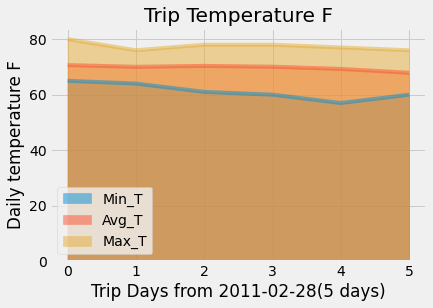

In [41]:
# Plot the daily normals as an area plot with `stacked=False`
#plot with daily average temperature only 
# The stacked with min, avg, max temperatures please refer to next cell

# Area plot

trip_df.plot.area(stacked=False)
plt.title("Trip Temperature F")
plt.xlabel("Trip Days from 2011-02-28(5 days)")
plt.ylabel("Daily temperature F")
plt.style.use('fivethirtyeight')
plt.show()
